 # Examples

---------------------------------

# Problem-1
<b>The Compression ratio of an Air-Standard otto Cycle is 9.5. Prior to the isentropic compression process, the air is at 100kPa and 308K. The Temperature at the end of the isentropic expansion process is 800K. Using Cold Air-Standard Assumptions, determine the rest of the state variables, energy changes and efficiency of the cycle.</b>

Given: { r : 9.5, P1 : 100, T1 : 308, T4 : 800 }

<h3>Importing Necessary Libraries</h3>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [3]:
class IdealOtto:
    
    def __init__(self,r=8,k=1.4,R=0.287,Cv=0.718):
        print('Ideal Otto Cycle')
        print('----------------')
        print()
        print('SI Units to be followed:')
        print('---------------------------------------------------------------------------------------------------')
        print('|            Entity               | Symbol(s) used |  Units  |          Units in brief            |')
        print('|-------------------------------------------------------------------------------------------------|')
        print('|           Pressures             | [P1,P2,P3,P4]  |  kPa    |           Kilo Pascal              |')
        print('|         Temperatures            | [T1,T2,T3,T4]  |  K      |             Kelvin                 |')
        print('|       Specific Volumes          | [v1,v2,v3,v4]  |  m^3    |           Cubic metres             |')
        print('|        Heat addition            |      q_in      |  kJ/kg  |       Kilo Joule per Kilogram      |')
        print('|        Heat rejection           |      q_out     |  kJ/kg  |       Kilo Joule per Kilogram      |')
        print('|          Work Output            |      w_net     |  kJ/kg  |       Kilo Joule per Kilogram      |')
        print('|          Efficiency             |      eta       |   NA    |          Dimensionless             |')
        print('|      Compression Ratio          |       r        |   NA    |          Dimensionless             |')
        print('| Specific Heat @ Constant Volume |       Cv       |  kJ/kgK | Kilo Joule per Kelvin per Kilogram |')
        print('|         Gas Constant            |       R        |  kJ/kgK | Kilo Joule per Kelvin per Kilogram |')
        print('---------------------------------------------------------------------------------------------------')
        print()
        #Defining default values for r, R, Cv and k
        self.r = r
        self.k = k
        self.R = R
        self.Cv = Cv
        print('______________________________________________________________________________________________________________')
        print('|   Executable Component    |  Component Type  |                          Utility                            |')
        print('|___________________________|__________________|_____________________________________________________________|')
        print('|                           |                  |  -> Allows to define a state with P, T & v values.          |') 
        print('|                           |                  |     {P - Pressure ; T - Temperature ; v - Specific Volume}  |')
        print('|                           |                  |  -> Input format (default : "unknown" for all 4 variables)- |')
        print('| define_state(state,P,T,v) |      Method      |     state : An integer in the range[1,4] both inclusive     |')
        print('|                           |                  |     P     : Float or Integer if known else Symbol wrt state |')
        print('|                           |                  |     T     : Float or Integer if known else Symbol wrt state |')
        print('|                           |                  |     v     : Float or Integer if known else Symbol wrt state |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Allows to add heat addition value.                      |')
        print('|                           |                  |     {q_in - Specific Heat Addition}                         |')
        print('|  add_heat_addition(q_in)  |      Method      |  -> Input format (default set to "unknown")-                |')
        print('|                           |                  |     q_in  : Float or Integer if known else Symbol           |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Allows to add heat rejection value.                     |')
        print('|                           |                  |     {q_out - Specific Heat Rejection}                       |')
        print('| add_heat_rejection(q_out) |      Method      |  -> Input format (default set to "unknown")-                |')
        print('|                           |                  |     q_out  : Float or Integer if known else Symbol          |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Allows to add work output value.                        |')
        print('|                           |                  |     {w_net - Net Specific Work Output}                      |')
        print('|  add_work_output(w_net)   |      Method      |  -> Input format (default set to "unknown")-                |')
        print('|                           |                  |     w_net  : Float or Integer if known else Symbol          |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Allows to add efficiency value.                         |')
        print('|                           |                  |     {eta - Efficiency of the Engine}                        |')
        print('|  add_efficiency(eta)      |      Method      |  -> Input format (default set to "unknown")-                |')
        print('|                           |                  |     eta  : Float or Integer if known else Symbol            |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Performs the analytical task of the problem statement   |')
        print('|                           |                  |     using CASA. {CASA - Cold air standard assumptions}      |')
        print('|   analysis_using_CASA()   |      Method      |  -> No input required.                                      |')
        print('|                           |                  |  -> Concludes with a message "Analysis Complete".           |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Enables to view values of Pressures, Temperatures, and  |')
        print('|      state_variables      |     Attribute    |     Specific Volumes in respective states.                  |')
        print('|                           |                  |  -> Returns a dictionary with respective parameters.        |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Enables to view values of q_in, q_out and w_net.        |')
        print('|       path_variables      |     Attribute    |  -> Returns a dictionary with respective parameters.        |')
        print('|                           |                  |                                                             |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Displays the analytical value of efficiency (eta).      |')
        print('|        efficiency         |     Attribute    |  -> Outputs a float value of efficiency.                    |')
        print('|                           |                  |                                                             |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|                           |                  |  -> Enables to calculate Efficiency without executing any   |')
        print('|                           |                  |     other commands.                                         |')
        print('|   get_efficiency(new_r)   |      Method      |  -> Uses CASA (takes in value for compression ratio).       |')
        print('|                           |                  |  -> Input format (default value set to 8)-                  |')
        print('|                           |                  |     new_r : Integer                                         |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|           r               |     Attribute    |  -> Displays the Compression ratio value (Default set to 8) |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|           k               |     Attribute    |  -> Displays Specific heat ratio value (default set t0 1.4) |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|           Cv              |     Attribute    |  -> Displays Specific Heat @ Constant Volume(Default=0.718) |')
        print('|---------------------------|------------------|-------------------------------------------------------------|')
        print('|           R               |     Attribute    |  -> Displays Gas constant value (Default set to 0.287)      |')
        print('|___________________________|__________________|_____________________________________________________________|')
        print()
        print('Default Values')
        print({'Compression Ratio':self.r, 'Specific Heat Ratio':self.k, 
               'Gas Constant':self.R,'Constant volume specific heat':self.Cv})
        #Defining state_variables for P,T and v
        self.state_variables = {'State-1':{'P1':'unknown','T1':'unknown','v1':'unknown'},
                                'State-2':{'P2':'unknown','T2':'unknown','v2':'unknown'},
                                'State-3':{'P3':'unknown','T3':'unknown','v3':'unknown'},
                                'State-4':{'P4':'unknown','T4':'unknown','v4':'unknown'},
                               'Mean_effective_pressure':'unknown'}
        #Defining path_variables for taking q_in,q_out and w_net
        self.path_variables = {'q_in':'unknown','q_out':'unknown','w_net':'unknown'}
        self.efficiency = 'unknown' #Defining efficiency for assigning it to eta
            
    def define_state(self,state,P='unknown',T='unknown',v='unknown'):
        self.state_variables['State-'+str(state)[-1]]['P'+str(state)[-1]] = P
        self.state_variables['State-'+str(state)[-1]]['T'+str(state)[-1]] = T
        self.state_variables['State-'+str(state)[-1]]['v'+str(state)[-1]] = v

    def add_heat_addition(self,q_in='unknown'):
        self.path_variables['q_in'] = q_in
        
    def add_heat_rejection(self,q_out='unknown'):
        self.path_variables['q_out'] = q_out
        
    def add_work_output(self,w_net='unknown'):
        self.path_variables['w_net'] = w_net
        
    def add_efficiency(self,eta='unknown'):
        self.efficiency = eta
        
    def get_efficiency(self,new_r=8):
        eta = 1-(1/pow(new_r,self.k-1))
        print('According to Cold Air-Standard Assumptions -')
        print('For Compression ratio = {},'.format(new_r))
        print('Efficiency of the Otto Cycle is {} i.e {}%'.format(round(float(eta),4),round(float(eta)*100,2)))
        
    def analysis_using_CASA(self):
        #CASA - Cold Air Standard Assumptions
        vl = [] #vl - variable list
        for i in range(1,5):
            for j in self.state_variables['State-'+str(i)].values():
                vl.append(j)
        for i in self.path_variables.values():
            vl.append(i)
        vl.append(self.efficiency)
        # Taking all variables and constants within vl (variable list) and then assigning them respectively as below.
        P1,T1,v1,P2,T2,v2,P3,T3,v3,P4,T4,v4,q_in,q_out,w_net,eta = vl
        
        t = tuple([i for i in vl if not isinstance(i,(int,float))]) #Taking only symbolic variables inside the tuple
        
        #Equations for solving
        eq1 = Eq(T2,T1*pow(self.r,self.k-1))
        eq2 = Eq(P2,P1*pow(self.r,self.k))
        eq3 = Eq(self.Cv*(T3-T2),q_in)
        eq4 = Eq(T3,T4*pow(self.r,self.k-1))
        eq5 = Eq(P3*T2,P2*T3)
        eq6 = Eq(P4*T1,P1*T4)
        eq7 = Eq(self.Cv*(T4-T1),q_out)
        eq8 = Eq(q_in-q_out,w_net)
        eq9 = Eq(eta,w_net/q_in)
        eq10 = Eq(P1*v1,self.R*T1)
        eq11 = Eq(v1,self.r*v2)
        eq12 = Eq(v4,v1)
        eq13 = Eq(v3,v2)
        
        #Using solve() from Sympy to solve simultaneous equations
        sol = solve((eq4,eq3,eq7,eq1,eq5,eq6,eq2,eq9,eq8,eq10,eq11,eq12,eq13),t,dict=True)
        
        #Assigning final values for respective variables
        for i in range(1,5):
            if(self.state_variables['State-'+str(i)]['P'+str(i)] in sol[0]):
                self.state_variables['State-'+str(i)]['P'+str(i)] = round(float(sol[0][self.state_variables['State-'+str(i)]['P'+str(i)]]),3)
            if(self.state_variables['State-'+str(i)]['T'+str(i)] in sol[0]):
                self.state_variables['State-'+str(i)]['T'+str(i)] = round(float(sol[0][self.state_variables['State-'+str(i)]['T'+str(i)]]),3)
            if(self.state_variables['State-'+str(i)]['v'+str(i)] in sol[0]):
                self.state_variables['State-'+str(i)]['v'+str(i)] = round(float(sol[0][self.state_variables['State-'+str(i)]['v'+str(i)]]),3)
        
        if(self.path_variables['q_in'] in sol[0]):
            self.path_variables['q_in'] = round(float(sol[0][q_in]),3)
        if(self.path_variables['q_out'] in sol[0]):
            self.path_variables['q_out'] = round(float(sol[0][q_out]),3)
        if(self.path_variables['w_net'] in sol[0]):
            self.path_variables['w_net'] = round(float(sol[0][w_net]),3)
        
        self.efficiency = round(float(sol[0][eta]),5)
        self.state_variables['Mean_effective_pressure'] = self.path_variables['w_net']/(self.state_variables['State-1']['v1']-self.state_variables['State-2']['v2'])
        
        #Plotting P-V Diagram
        Y1 = self.state_variables['State-1']['P1']
        X1 = self.state_variables['State-1']['v1']
        Y2 = self.state_variables['State-2']['P2']
        X2 = self.state_variables['State-2']['v2']
        Y3 = self.state_variables['State-3']['P3']
        X3 = self.state_variables['State-3']['v3']
        Y4 = self.state_variables['State-4']['P4']
        X4 = self.state_variables['State-4']['v4']
        
        c1 = Y1*pow(X1,self.k)
        c2 = Y3*pow(X3,self.k)
        
        #Isentropic Compression
        x1 = np.linspace(X1,X2,num=50)
        y1 = c1/pow(x1,self.k)
        
        #Constant Volume Heat Addition
        y2 = np.linspace(y1[-1],Y3,num=50)
        x2 = np.array([x1[-1] for i in range(50)])
        
        #Isentropic Expansion
        x3 = np.linspace(X3,X4,num=50)
        y3 = c2/pow(x3,self.k)
        
        #Constant Volume heat Rejection
        y4 = np.linspace(y3[-1],Y1,num=50)
        x4 = np.array([x3[-1] for i in range(50)])
        
        plt.plot(x1,y1,label='Isentropic Compression')
        plt.plot(x2,y2,label='Constant Volume Heat Addition')
        plt.plot(x3,y3,label='Isentropic Expansion')
        plt.plot(x4,y4,label='Constant Volume Heat Rejection')
        plt.xlabel('Specific Volume'),plt.ylabel('Pressure'),plt.title('P-V diagram of Ideal Otto Cycle')
        plt.legend()
        
        print('Analysis Complete')
        print('Execute state_variables, path_variables and efficiency for final values')

<h3>Instantiating the Class "IdealOtto</h3>

In [4]:
cycle1 = IdealOtto(9.5)

Ideal Otto Cycle
----------------

SI Units to be followed:
---------------------------------------------------------------------------------------------------
|            Entity               | Symbol(s) used |  Units  |          Units in brief            |
|-------------------------------------------------------------------------------------------------|
|           Pressures             | [P1,P2,P3,P4]  |  kPa    |           Kilo Pascal              |
|         Temperatures            | [T1,T2,T3,T4]  |  K      |             Kelvin                 |
|       Specific Volumes          | [v1,v2,v3,v4]  |  m^3    |           Cubic metres             |
|        Heat addition            |      q_in      |  kJ/kg  |       Kilo Joule per Kilogram      |
|        Heat rejection           |      q_out     |  kJ/kg  |       Kilo Joule per Kilogram      |
|          Work Output            |      w_net     |  kJ/kg  |       Kilo Joule per Kilogram      |
|          Efficiency             |     

<h3>Defining unknown variables as symbols</h3>

In [5]:
P3,P4,P2 = symbols('P3,P4,P2')
v1,v2,v3,v4 = symbols('v1,v2,v3,v4')
T2,T3 = symbols('T2,T3')
q_in,q_out,w_net,eta = symbols('q_in,q_out,w_net,eta')

<h3>Assigning Values and Symbols according to the problem statement</h3>

In [6]:
cycle1.define_state(1,100,308,v1)
cycle1.define_state(2,P2,T2,v2)
cycle1.define_state(3,P3,T3,v3)
cycle1.define_state(4,P4,800,v4)
cycle1.add_heat_addition(q_in)
cycle1.add_heat_rejection(q_out)
cycle1.add_work_output(w_net)
cycle1.add_efficiency(eta)

In [7]:
cycle1.state_variables

{'State-1': {'P1': 100, 'T1': 308, 'v1': v1},
 'State-2': {'P2': P2, 'T2': T2, 'v2': v2},
 'State-3': {'P3': P3, 'T3': T3, 'v3': v3},
 'State-4': {'P4': P4, 'T4': 800, 'v4': v4},
 'Mean_effective_pressure': 'unknown'}

In [8]:
cycle1.path_variables

{'q_in': q_in, 'q_out': q_out, 'w_net': w_net}

In [9]:
cycle1.efficiency

eta

<h3>Performing Analysis</h3> 

Analysis Complete
Execute state_variables, path_variables and efficiency for final values


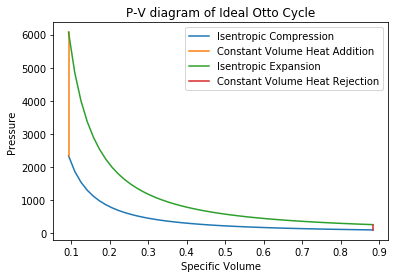

In [10]:
cycle1.analysis_using_CASA()

<h3>Checking for Final Values</h3>

In [11]:
cycle1.state_variables

{'State-1': {'P1': 100, 'T1': 308, 'v1': 0.884},
 'State-2': {'P2': 2337.831, 'T2': 757.949, 'v2': 0.093},
 'State-3': {'P3': 6072.287, 'T3': 1968.699, 'v3': 0.093},
 'State-4': {'P4': 259.74, 'T4': 800, 'v4': 0.884},
 'Mean_effective_pressure': 652.4184576485461}

In [12]:
cycle1.path_variables

{'q_in': 869.319, 'q_out': 353.256, 'w_net': 516.063}

In [13]:
cycle1.efficiency

0.59364

<h3>Calculating efficiency for different compression ratio values</h3>

In [14]:
cycle1.get_efficiency(10.5)

According to Cold Air-Standard Assumptions -
For Compression ratio = 10.5,
Efficiency of the Otto Cycle is 0.6096 i.e 60.96%


#END#

----------------------------

# Problem-2
<b>An Ideal Otto Cycle has a compression ratio of 8. At the beginning of the compression process, air is at 100kPa and 300K, and 800kJ/kg of heat is transferred to air during the constant volume heat addition process. Based on the Cold Air-Standard Assumptions, find the rest of the state variables, energy requirements and efficiency.</b>

Given: { r : 8, P1 : 100, T1 : 300, q_in = 800 }

In [15]:
cycle2 = IdealOtto(8)

Ideal Otto Cycle
----------------

SI Units to be followed:
---------------------------------------------------------------------------------------------------
|            Entity               | Symbol(s) used |  Units  |          Units in brief            |
|-------------------------------------------------------------------------------------------------|
|           Pressures             | [P1,P2,P3,P4]  |  kPa    |           Kilo Pascal              |
|         Temperatures            | [T1,T2,T3,T4]  |  K      |             Kelvin                 |
|       Specific Volumes          | [v1,v2,v3,v4]  |  m^3    |           Cubic metres             |
|        Heat addition            |      q_in      |  kJ/kg  |       Kilo Joule per Kilogram      |
|        Heat rejection           |      q_out     |  kJ/kg  |       Kilo Joule per Kilogram      |
|          Work Output            |      w_net     |  kJ/kg  |       Kilo Joule per Kilogram      |
|          Efficiency             |     

In [16]:
P3,P4,P2 = symbols('P3,P4,P2')
v1,v2,v3,v4 = symbols('v1,v2,v3,v4')
T2,T3,T4 = symbols('T2,T3,T4')
q_out,w_net,eta = symbols('q_out,w_net,eta')

In [17]:
cycle2.define_state(1,100,300,v1)
cycle2.define_state(2,P2,T2,v2)
cycle2.define_state(3,P3,T3,v3)
cycle2.define_state(4,P4,T4,v4)
cycle2.add_heat_addition(800)
cycle2.add_heat_rejection(q_out)
cycle2.add_work_output(w_net)
cycle2.add_efficiency(eta)

In [18]:
cycle2.state_variables

{'State-1': {'P1': 100, 'T1': 300, 'v1': v1},
 'State-2': {'P2': P2, 'T2': T2, 'v2': v2},
 'State-3': {'P3': P3, 'T3': T3, 'v3': v3},
 'State-4': {'P4': P4, 'T4': T4, 'v4': v4},
 'Mean_effective_pressure': 'unknown'}

In [19]:
cycle2.path_variables

{'q_in': 800, 'q_out': q_out, 'w_net': w_net}

In [20]:
cycle2.efficiency

eta

Analysis Complete
Execute state_variables, path_variables and efficiency for final values


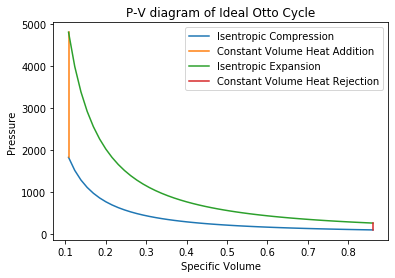

In [21]:
cycle2.analysis_using_CASA()

In [22]:
cycle2.state_variables

{'State-1': {'P1': 100, 'T1': 300, 'v1': 0.861},
 'State-2': {'P2': 1837.917, 'T2': 689.219, 'v2': 0.108},
 'State-3': {'P3': 4809.134, 'T3': 1803.425, 'v3': 0.108},
 'State-4': {'P4': 261.662, 'T4': 784.986, 'v4': 0.861},
 'Mean_effective_pressure': 599.9734395750331}

In [23]:
cycle2.path_variables

{'q_in': 800, 'q_out': 348.22, 'w_net': 451.78}

In [24]:
cycle2.efficiency

0.56472

#END#

-----------------------

# Problem-3
An ideal Otto cycle has a compression ratio of 8. At the beginning of the compression process, air is at 95 kPa and 27C, and 750 kJ/kg of heat is transferred to air during the constant-volume heat-addition process. Taking into account the Cold Air-Standard Assumptions, determine -

    (a) the pressure and temperature at the end of the heat- addition process
    (b) the net work output
    (c) the thermal efficiency
    (d) the mean effective pressure for the cycle
    
Given: { r : 8, P1 : 95kPa, T1 : 300K, q_in : 750 kJ/kg}

In [25]:
cycle3 = IdealOtto(8)

Ideal Otto Cycle
----------------

SI Units to be followed:
---------------------------------------------------------------------------------------------------
|            Entity               | Symbol(s) used |  Units  |          Units in brief            |
|-------------------------------------------------------------------------------------------------|
|           Pressures             | [P1,P2,P3,P4]  |  kPa    |           Kilo Pascal              |
|         Temperatures            | [T1,T2,T3,T4]  |  K      |             Kelvin                 |
|       Specific Volumes          | [v1,v2,v3,v4]  |  m^3    |           Cubic metres             |
|        Heat addition            |      q_in      |  kJ/kg  |       Kilo Joule per Kilogram      |
|        Heat rejection           |      q_out     |  kJ/kg  |       Kilo Joule per Kilogram      |
|          Work Output            |      w_net     |  kJ/kg  |       Kilo Joule per Kilogram      |
|          Efficiency             |     

In [26]:
P3,P4,P2 = symbols('P3,P4,P2')
v1,v2,v3,v4 = symbols('v1,v2,v3,v4')
T2,T3,T4 = symbols('T2,T3,T4')
q_out,w_net,eta = symbols('q_out,w_net,eta')

In [27]:
cycle3.define_state(1,95,300,v1)
cycle3.define_state(2,P2,T2,v2)
cycle3.define_state(3,P3,T3,v3)
cycle3.define_state(4,P4,T4,v4)
cycle3.add_heat_addition(750)
cycle3.add_heat_rejection(q_out)
cycle3.add_work_output(w_net)
cycle3.add_efficiency(eta)

In [28]:
cycle3.state_variables

{'State-1': {'P1': 95, 'T1': 300, 'v1': v1},
 'State-2': {'P2': P2, 'T2': T2, 'v2': v2},
 'State-3': {'P3': P3, 'T3': T3, 'v3': v3},
 'State-4': {'P4': P4, 'T4': T4, 'v4': v4},
 'Mean_effective_pressure': 'unknown'}

In [29]:
cycle3.path_variables

{'q_in': 750, 'q_out': q_out, 'w_net': w_net}

In [30]:
cycle3.efficiency

eta

Analysis Complete
Execute state_variables, path_variables and efficiency for final values


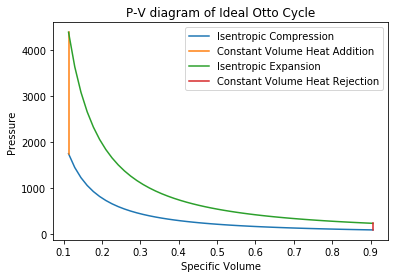

In [32]:
cycle3.analysis_using_CASA()

In [33]:
cycle3.state_variables

{'State-1': {'P1': 95, 'T1': 300, 'v1': 0.906},
 'State-2': {'P2': 1746.021, 'T2': 689.219, 'v2': 0.113},
 'State-3': {'P3': 4392.261, 'T3': 1733.787, 'v3': 0.113},
 'State-4': {'P4': 238.98, 'T4': 754.675, 'v4': 0.906},
 'Mean_effective_pressure': 534.1034047919293}

In [34]:
cycle3.path_variables

{'q_in': 750, 'q_out': 326.456, 'w_net': 423.544}

In [35]:
cycle3.efficiency

0.56472

#END#

For detailed explanation and references, check "Description - Ideal Otto Cycle".

For Python code, check "Python Code - Ideal Otto Cycle".